In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\chris\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv("data/Advertising.csv")

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data=data.drop("Unnamed: 0",axis=1) #removing the unwanted column

In [5]:
data.isna().sum() #there is no missing value

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x267de308b48>,
 'caps': [<matplotlib.lines.Line2D at 0x267de30fc48>,
 'boxes': [<matplotlib.lines.Line2D at 0x267de2f9f48>],
 'medians': [<matplotlib.lines.Line2D at 0x267de315d48>],
 'fliers': [<matplotlib.lines.Line2D at 0x267de315e48>],
 'means': []}

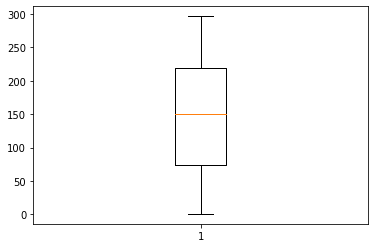

In [6]:
plt.boxplot(data.TV)

{'whiskers': [<matplotlib.lines.Line2D at 0x267de3ba308>,
 'caps': [<matplotlib.lines.Line2D at 0x267de3babc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x267de3b6848>],
 'medians': [<matplotlib.lines.Line2D at 0x267de3bdb48>],
 'fliers': [<matplotlib.lines.Line2D at 0x267de3c3b08>],
 'means': []}

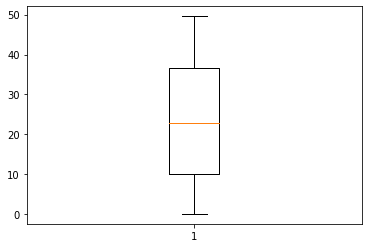

In [7]:
plt.boxplot(data.radio)

{'whiskers': [<matplotlib.lines.Line2D at 0x267de42cb08>,
 'caps': [<matplotlib.lines.Line2D at 0x267de432a88>,
 'boxes': [<matplotlib.lines.Line2D at 0x267de426f48>],
 'medians': [<matplotlib.lines.Line2D at 0x267de434a08>],
 'fliers': [<matplotlib.lines.Line2D at 0x267de434b08>],
 'means': []}

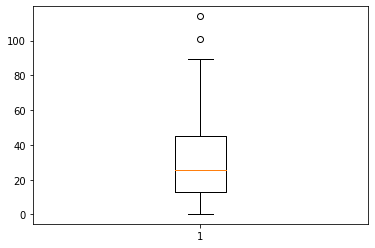

In [8]:
plt.boxplot(data.newspaper)  #newspaper has few outliers

In [9]:
npd= data.newspaper.describe()

In [10]:
npd

count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: newspaper, dtype: float64

In [11]:
UT = npd['75%']+1.5*(npd['75%']-npd['25%']) #Upper Threshold Value for newspaper
UT

93.625

In [12]:
data['newspaper'][data['newspaper']>UT]  = UT

In [13]:
data.newspaper.describe()

count    200.000000
mean      30.415750
std       21.316901
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max       93.625000
Name: newspaper, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x267de4adec8>,
 'caps': [<matplotlib.lines.Line2D at 0x267de4b2e88>,
 'boxes': [<matplotlib.lines.Line2D at 0x267de4ad488>],
 'medians': [<matplotlib.lines.Line2D at 0x267de4b5e08>],
 'fliers': [<matplotlib.lines.Line2D at 0x267de4b5f08>],
 'means': []}

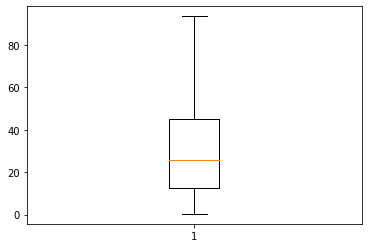

In [14]:
#new boxplot afer outlier correction
plt.boxplot(data['newspaper'])

{'whiskers': [<matplotlib.lines.Line2D at 0x267de517348>,
 'caps': [<matplotlib.lines.Line2D at 0x267de517c08>,
 'boxes': [<matplotlib.lines.Line2D at 0x267de5158c8>],
 'medians': [<matplotlib.lines.Line2D at 0x267de51bb88>],
 'fliers': [<matplotlib.lines.Line2D at 0x267de523a08>],
 'means': []}

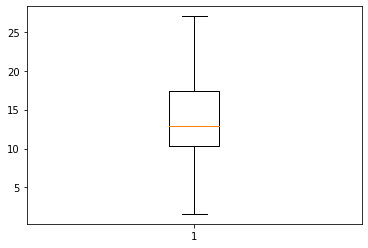

In [15]:
plt.boxplot(data.sales)

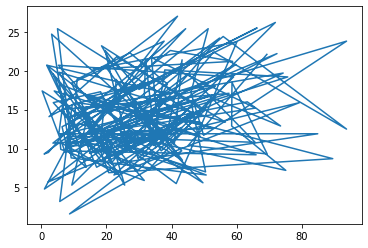

In [16]:
plt.plot(data['newspaper'],data['sales']) #relationship is not purely linear

In [17]:
#correlation matrix
cm=data.corr()
cm

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.059325,0.782224
radio,0.054809,1.000000,0.355953,0.576223
newspaper,0.059325,0.355953,1.000000,0.231432
sales,0.782224,0.576223,0.231432,1.000000


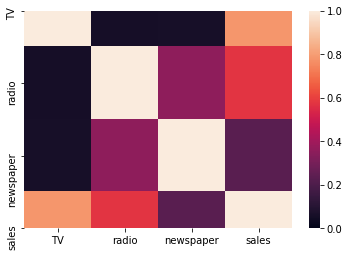

In [18]:
sns.heatmap(cm,vmax=1,vmin=0) #all the inputs have good cooreation wiht sales.
#TV has the highest impact and newspaper has the lowest impact

In [19]:
#Split the data into X and y
X=data.drop("sales",axis=1)
y=data['sales']

In [20]:
#split the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42) #0.75 data will be for training.

In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() #creating object of LinearRegression
reg.fit(X_train,y_train) #training and fitting LR object using training data

#fit command is used for training a model using train data.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
#coeeficients of liner regression - m1,m2,m3
reg.coef_

array([0.04543596, 0.19147751, 0.00254094])

In [23]:
#intercept of liner regression - c
reg.intercept_

2.7783929910850507

### The Linear Equation will be sales = 0.04341682*TV + 0.19587593*radio + 0.00239198*newspaper + 3.18402766082918

In [24]:
ypred=reg.predict(X_test)  #predicting the sales for testing data


In [25]:
from sklearn.metrics import mean_squared_error #calculating MSE
MSE=mean_squared_error(ypred,y_test)
print("MSE:",MSE)

MSE: 2.8783955736842324


In [26]:
sum((y_test-ypred)**2)/len(ypred) #this is how we can calculate MSE.

2.878395573684232

In [27]:
Results = X_test.copy()
Results['Actual']=y_test
Results['Predicted']=ypred
Results.head()

,TV,radio,newspaper,Actual,Predicted
95,163.3,31.6,52.9,16.9,16.383191
15,195.4,47.7,52.9,22.4,20.924473
30,292.9,28.3,43.2,21.4,21.615169
158,11.7,36.9,45.2,7.3,10.490365
128,220.3,49.0,3.2,24.7,22.178465


[]

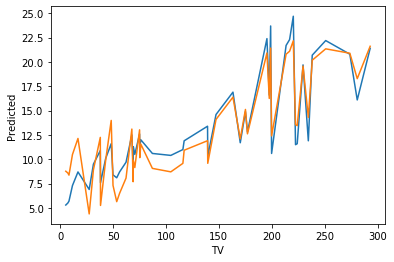

In [28]:
sns.lineplot(x='TV',y='Actual',data=Results)
sns.lineplot(x='TV',y='Predicted',data=Results)
plt.plot()